## Practical Machine Learning
### Assignment 7 - Image Processing with Convolutional Neural Networks(CNN)

Description:
This assignment follows the same structure as Assignment 6. We will employ at least a 2x2 completely crossed experimental design. We will again use a simple training-and-test regimen, perhaps with a three-way partitioning of the data into training, dev, and test sets. The factors in the design may include numbers of layers and/or nodes within layers, types of layers (convolutional or pooling), and/or other hyperparameters. We will utilize convolutional neural networks (CNNs) within Python TensorFlow. 

The case data present a binary classification task, a subset of the data from a Kaggle competition in 2013
https://www.kaggle.com/c/dogs-vs-cats

The original data consisted of 25,000 images of cats and dogs. To ensure that the problem may be run on typical personal computers with limited memory and no graphical processing units (GPUs), we work with only 2,000 images: 1,000 cat images and 1,000 dog images. The original image files are provided in a zip archive:

cats_dogs_images.zip

After the data have been prepared for analysis in a jump-start program 
(included in the zip archive cats-dogs-jump-start-v002.zip under Modules / Technology Resources), 
we will divide the images into training, dev, and test sets for evaluating alternative neural network models per our experimental design.

Management Problem
Assume that we are providing advice to a website provider who is looking for tools to automatically label images provided by end users. As we look across the factors in the study, making recommendations to management about image classification, we are most concerned about achieving the highest possible accuracy in image classification. That is, we should be willing to sacrifice training time for model accuracy. What type of machine learning model works best? If it is a convolutional neural network, what type of network should we use? Part of this recommendation may concern information about the initial images themselves (input data for the classification task). What types of images work best?

Programming Resources
Refer once again to the programming resources cited under Assignment 6. Convolutional neural network coding examples are provided in the Géron (2017) textbook.

Géron, A. (2017). Hands-on machine learning with Scikit-Learn & TensorFlow: Concepts, tools, and techniques to build intelligent systems. Sebastopol, CA: O'Reilly. [ISBN-13 978-1-491-96229-9]. Chapter 13: Convolutional Neural Networks (pp. 353–378)  Source code available here (Links to an external site.)Links to an external site.. 

Regarding memory issues. With the large number of parameters being fit in deep learning tasks, out-of-memory errors may be encountered on personal computers. Géron (2017, p. 363) provides these suggestions with regard to CNNs:

If training crashes because of an out-of-memory error, you can try reducing the mini-batch size. Alternatively, you can try reducing dimensionality using a stride, or removing a few layers. Or you can try using 16-bit floats instead of 32-bit floats.

Additional background regarding computer vision, CNNs, and TensorFlow is provided under:

Modules / Technology Resources / Convolutional Neural Networks with TensorFlow

 

Grading Guidelines (50 points)
(1) Data preparation, exploration, visualization (10 points)
(2) Review research design and modeling methods (10 points)
(3) Review results, evaluate models (10 points)
(4) Implementation and programming (10 points)
(5) Exposition, problem description, and management recommendations (10 points)

 
Deliverables and File Formats
- Please upload the completed jupyter notebook (PREFERRED)

OR

Create a folder or directory with all supplementary files with your last name at the beginning of the folder name, compress that folder with zip compression, and post the zip-archived folder under the assignment link in Canvas. The following files should be included in an archive folder/directory that is uploaded as a single zip-compressed file. (Use zip, not StuffIt or any 7z or other compression method.)

1. Provide a double-spaced paper with a two-page maximum for the text. The paper should include (1) a summary and problem definition for management; (2) discussion of the research design, measurement and statistical methods, traditional and machine learning methods employed; (3) overview of programming work; and (4) review of results with recommendations for management. (The paper must be provided as an Adobe Acrobat pdf file. MS Word files are NOT acceptable.)

2. Files or links to files should be provided in the format as used by the Python program.

3. Complete program code in Python used to access and analyze the data. The code should be submitted as a plain text file, so it can be executed as a program in a single Python program execution within an interactive Python shell. (You may include a Python notebook in addition to the complete program code.) If there are calls to Python modules, ensure that the directory structure is maintained so that the main program may be fully executed. 

4. Output from the program, such as console listing/logs, text files, and graphics output for visualizations. If you use Professional Studies database servers or systems, include Linux logs of your sessions as plain text files.

5. List file names and descriptions of files in the zip-compressed folder/directory.


Formatting Python Code
Refer to Google’s Python Style Guide (Links to an external site.)Links to an external site. for ideas about formatting Python code

Also refer to Google’s TensorFlow Style Guide (Links to an external site.)Links to an external site.

Comment often and in detail, highlighting major sections of code, describing the thinking behind the modeling and programming methods being employed.

In [40]:
# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

#ignore tensorflow related warnings
import os
import tensorflow as tf

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'  # or any {'0', '1', '2'}

In [41]:
# coding: utf-8

# Initial deep neural network set-up from 
# Géron, A. 2017. Hands-On Machine Learning with Scikit-Learn 
#    & TensorFlow: Concepts, Tools, and Techniques to Build 
#    Intelligent Systems. Sebastopol, Calif.: O'Reilly. 
#    [ISBN-13 978-1-491-96229-9] 
#    Source code available at https://github.com/ageron/handson-ml
#    See file 10_introduction_to_artificial_neural_networks.ipynb 
#    Revised from MNIST to Cats and Dogs to begin Assignment 7
#    #CatsDogs# comment lines show additions/revisions for Cats and Dogs

In [42]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

In [43]:
# Common imports for our work
import os 
import numpy as np
import tensorflow as tf
import time
import pandas as pd  # data frame operations  
import numpy as np  # arrays and math functions
import matplotlib.pyplot as plt  # static plotting
import re # regular expressions
import scipy
import os # Operation System
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from matplotlib.backends.backend_pdf import PdfPages
import sklearn
import tensorflow as tf
from datetime import datetime
from __future__ import division, print_function, unicode_literals
import cv2
#import seaborn as sns
start_time_overall = time.clock()

##### Secure dataset and image preprocessing

In [44]:
# create a data directory in the present working directory
os.getcwd() 
os.chdir('.')
print('Working Directory')
print(os.getcwd())  
random_seed=9999

Working Directory
/home/rj/PML/Week 7 Cats and Dogs


In [45]:
# Set path variables ( make sure the directories & the images exist )
cat_image_dir_name = './cats_dogs_images/cats'
dog_image_dir_name = './cats_dogs_images/dogs'

In [46]:
#Standard Functions
# Sorting of file names facilitated by
def tryint(s):
    try:
        return int(s)
    except:
        return s

def alphanum_key(s):
    """ Turn a string into a list of string and number chunks.
        "z23a" -> ["z", 23, "a"]
    """
    return [ tryint(c) for c in re.split('([0-9]+)', s) ]

def sort_nicely(l):
    """ Sort the given list in the way that humans expect.
    """
    l.sort(key=alphanum_key)
    
# Generate list of file names, excluding hidden files    
def directory_list (dir_name):
    start_list = os.listdir(dir_name)
    end_list = []
    for file in start_list:
        if (not file.startswith('.')):
            end_list.append(file) 
    end_list.sort(key = alphanum_key)        
    return(end_list)        

cat_file_names = directory_list(cat_image_dir_name)
cat_file_names = cat_file_names[0:1000]
dog_file_names = directory_list(dog_image_dir_name) 
dog_file_names = dog_file_names[0:1000]

In [47]:
#   Convert image to numpy array. 3 channels for color  and 1 converted to grayscale
#   Info on npy binary format for saving numpy arrays https://towardsdatascience.com/
def parse_grayscale(image_file_path):
    image = cv2.imread(image_file_path, cv2.IMREAD_GRAYSCALE)
    return(image)
    
def parse_color(image_file_path):
    image = cv2.imread(image_file_path, cv2.IMREAD_COLOR)
    # Default cv2 is BGR... need RGB
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return(image)
  
def parse_grayscale_and_resize(image_file_path, size = (64, 64)):
    image = cv2.imread(image_file_path, cv2.IMREAD_GRAYSCALE)
    image = cv2.resize(image, size)
    return(image)

def parse_color_and_resize(image_file_path, size = (64, 64)):
    image = cv2.imread(image_file_path, cv2.IMREAD_COLOR)
    # Default cv2 is BGR... need RGB
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, size)
    return(image)  
    
def show_grayscale_image(image):
    plt.imshow(image, cmap = 'gray') 
    plt.axis('off')
    plt.show()

def show_color_image(image):
    plt.imshow(image) 
    plt.axis('off')
    plt.show()    

In [48]:
#Examine dimensions of original raster images 
cats_shapes = []
for ifile in range(len(cat_file_names)):
    image_file_path = os.path.join(cat_image_dir_name, cat_file_names[ifile])
    image = parse_color(image_file_path)
    cats_shapes.append(image.shape)
print('\n\nCat image file shapes:\n')    
#print(cats_shapes)    

dogs_shapes = []
for ifile in range(len(cat_file_names)):
    image_file_path = os.path.join(cat_image_dir_name, cat_file_names[ifile])
    image = parse_color(image_file_path)
    dogs_shapes.append(image.shape)    
print('\n\nDog image file shapes:\n') 
#print(dogs_shapes)



Cat image file shapes:



Dog image file shapes:



In [49]:
# Save numpy array objects for analysis 
from pathlib import Path
my_file = Path('./cats_dogs_arrays_1000')
if my_file.exists():
    import shutil
    shutil.rmtree(my_file)

outdir = './cats_dogs_arrays_1000'
os.mkdir(outdir)

In [50]:
# Create Numpy Image Arrays
#----------------------------------------------------------------------
print('\nProcessing image files to 64x64 color or grayscale arrays')
# Create cats_1000_64_64_3 and numpy array for 1000 cat images in color
start_time_m1=time.clock()
cats_1000_64_64_3 = np.zeros((1000, 64, 64, 3))  
for ifile in range(len(cat_file_names)):
    image_file_path = os.path.join(cat_image_dir_name, cat_file_names[ifile])
    image = parse_color_and_resize(image_file_path, size = (64, 64))
    cats_1000_64_64_3[ifile,:,:,:] = image
       
# Create dogs_1000_64_64_3 and numpy array for 1000 dog images in color   
dogs_1000_64_64_3 = np.zeros((1000, 64, 64, 3))  
for ifile in range(len(dog_file_names)):
    image_file_path = os.path.join(dog_image_dir_name, dog_file_names[ifile])
    image = parse_color_and_resize(image_file_path, size = (64, 64))
    dogs_1000_64_64_3[ifile,:,:,:] = image

# Create cats_1000_64_64_1 and numpy array for 1000 cat images in grayscale
cats_1000_64_64_1 = np.zeros((1000, 64, 64, 1))  
for ifile in range(len(cat_file_names)):
    image_file_path = os.path.join(cat_image_dir_name, cat_file_names[ifile])
    image = parse_grayscale_and_resize(image_file_path, size = (64, 64))
    cats_1000_64_64_1[ifile,:,:,0] = image
       
# Create dogs_1000_64_64_1 and numpy array for 1000 dog images in grayscale   
dogs_1000_64_64_1 = np.zeros((1000, 64, 64, 1))  
for ifile in range(len(dog_file_names)):
    image_file_path = os.path.join(dog_image_dir_name, dog_file_names[ifile])
    image = parse_grayscale_and_resize(image_file_path, size = (64, 64))
    dogs_1000_64_64_1[ifile,:,:,0] = image
    
# Save numpy array objects for analysis       
disk_time_m1=time.clock()
np.save(os.path.join(outdir, 'cats_1000_64_64_3.npy'), cats_1000_64_64_3)
np.save(os.path.join(outdir, 'dogs_1000_64_64_3.npy'), dogs_1000_64_64_3)
np.save(os.path.join(outdir, 'cats_1000_64_64_1.npy'), cats_1000_64_64_1)
np.save(os.path.join(outdir, 'dogs_1000_64_64_1.npy'), dogs_1000_64_64_1)
disk_time = time.clock() - disk_time_m1
print('\nRun complete')


Processing image files to 64x64 color or grayscale arrays

Run complete


In [51]:
# ------------------------------------------------------------------------
print('\nProcessing image files to 128x128 color or grayscale arrays')

# Create cats_1000_128_128_3 and numpy array for 1000 cat images in color
cats_1000_128_128_3 = np.zeros((1000, 128, 128, 3))  
for ifile in range(len(cat_file_names)):
    image_file_path = os.path.join(cat_image_dir_name, cat_file_names[ifile])
    image = parse_color_and_resize(image_file_path, size = (128, 128))
    cats_1000_128_128_3[ifile,:,:,:] = image
       
# Create dogs_1000_128_128_3 and numpy array for 1000 dog images in color   
dogs_1000_128_128_3 = np.zeros((1000, 128, 128, 3))  
for ifile in range(len(dog_file_names)):
    image_file_path = os.path.join(dog_image_dir_name, dog_file_names[ifile])
    image = parse_color_and_resize(image_file_path, size = (128, 128))
    dogs_1000_128_128_3[ifile,:,:,:] = image

# Create cats_1000_128_128_1 and numpy array for 1000 cat images in grayscale
cats_1000_128_128_1 = np.zeros((1000, 128, 128, 1))  
for ifile in range(len(cat_file_names)):
    image_file_path = os.path.join(cat_image_dir_name, cat_file_names[ifile])
    image = parse_grayscale_and_resize(image_file_path, size = (128, 128))
    cats_1000_128_128_1[ifile,:,:,0] = image
       
# Create dogs_1000_128_128_1 and numpy array for 1000 dog images in grayscale   
dogs_1000_128_128_1 = np.zeros((1000, 128, 128, 1))  
for ifile in range(len(dog_file_names)):
    image_file_path = os.path.join(dog_image_dir_name, dog_file_names[ifile])
    image = parse_grayscale_and_resize(image_file_path, size = (128, 128))
    dogs_1000_128_128_1[ifile,:,:,0] = image   

    
# Save numpy array objects for analysis 
disk_time_m1=time.clock()
np.save(os.path.join(outdir, 'cats_1000_128_128_3.npy'), cats_1000_128_128_3)
np.save(os.path.join(outdir, 'dogs_1000_128_128_3.npy'), dogs_1000_128_128_3)
np.save(os.path.join(outdir, 'cats_1000_128_128_1.npy'), cats_1000_128_128_1)
np.save(os.path.join(outdir, 'dogs_1000_128_128_1.npy'), dogs_1000_128_128_1)
disk_time = disk_time + time.clock() - disk_time_m1
print('\nRun complete')    


Processing image files to 128x128 color or grayscale arrays

Run complete


In [52]:
# ------------------------------------------------------------------------
print('\nProcessing image files to 256x256 color or grayscale arrays')
# Create cats_1000_256_256_3 and numpy array for 1000 cat images in color
cats_1000_256_256_3 = np.zeros((1000, 256, 256, 3))  
for ifile in range(len(cat_file_names)):
    image_file_path = os.path.join(cat_image_dir_name, cat_file_names[ifile])
    image = parse_color_and_resize(image_file_path, size = (256, 256))
    cats_1000_256_256_3[ifile,:,:,:] = image
       
# Create dogs_1000_256_256_3 and numpy array for 1000 dog images in color   
dogs_1000_256_256_3 = np.zeros((1000, 256, 256, 3))  
for ifile in range(len(dog_file_names)):
    image_file_path = os.path.join(dog_image_dir_name, dog_file_names[ifile])
    image = parse_color_and_resize(image_file_path, size = (256, 256))
    dogs_1000_256_256_3[ifile,:,:,:] = image

# Create cats_1000_256_256_1 and numpy array for 1000 cat images in grayscale
cats_1000_256_256_1 = np.zeros((1000, 256, 256, 1))  
for ifile in range(len(cat_file_names)):
    image_file_path = os.path.join(cat_image_dir_name, cat_file_names[ifile])
    image = parse_grayscale_and_resize(image_file_path, size = (256, 256))
    cats_1000_256_256_1[ifile,:,:,0] = image
       
# Create dogs_1000_256_256_1 and numpy array for 1000 dog images in grayscale   
dogs_1000_256_256_1 = np.zeros((1000, 256, 256, 1))  
for ifile in range(len(dog_file_names)):
    image_file_path = os.path.join(dog_image_dir_name, dog_file_names[ifile])
    image = parse_grayscale_and_resize(image_file_path, size = (256, 256))
    dogs_1000_256_256_1[ifile,:,:,0] = image
    
# Save numpy array objects for analysis 
disk_time_m1=time.clock()
np.save(os.path.join(outdir, 'cats_1000_256_256_3.npy'), cats_1000_256_256_3)
np.save(os.path.join(outdir, 'dogs_1000_256_256_3.npy'), dogs_1000_256_256_3)
np.save(os.path.join(outdir, 'cats_1000_256_256_1.npy'), cats_1000_256_256_1)
np.save(os.path.join(outdir, 'dogs_1000_256_256_1.npy'), dogs_1000_256_256_1)
disk_time = disk_time + time.clock() - disk_time_m1
print('\nRun complete')    


Processing image files to 256x256 color or grayscale arrays

Run complete


In [53]:
# ------------------------------------------------------------------------
print('\nProcessing image files to 512x512 color or grayscale arrays')
# Create cats_1000_512_512_3 and numpy array for 1000 cat images in color
cats_1000_512_512_3 = np.zeros((1000, 512, 512, 3))  
for ifile in range(len(cat_file_names)):
    image_file_path = os.path.join(cat_image_dir_name, cat_file_names[ifile])
    image = parse_color_and_resize(image_file_path, size = (512, 512))
    cats_1000_512_512_3[ifile,:,:,:] = image
       
# Create dogs_1000_512_512_3 and numpy array for 1000 dog images in color   
dogs_1000_512_512_3 = np.zeros((1000, 512, 512, 3))  
for ifile in range(len(dog_file_names)):
    image_file_path = os.path.join(dog_image_dir_name, dog_file_names[ifile])
    image = parse_color_and_resize(image_file_path, size = (512, 512))
    dogs_1000_512_512_3[ifile,:,:,:] = image

# Create cats_1000_512_512_1 and numpy array for 1000 cat images in grayscale
cats_1000_512_512_1 = np.zeros((1000, 512, 512, 1))  
for ifile in range(len(cat_file_names)):
    image_file_path = os.path.join(cat_image_dir_name, cat_file_names[ifile])
    image = parse_grayscale_and_resize(image_file_path, size = (512, 512))
    cats_1000_512_512_1[ifile,:,:,0] = image
       
# Create dogs_1000_512_512_1 and numpy array for 1000 dog images in grayscale   
dogs_1000_512_512_1 = np.zeros((1000, 512, 512, 1))  
for ifile in range(len(dog_file_names)):
    image_file_path = os.path.join(dog_image_dir_name, dog_file_names[ifile])
    image = parse_grayscale_and_resize(image_file_path, size = (512, 512))
    dogs_1000_512_512_1[ifile,:,:,0] = image
    
# Save numpy array objects for analysis 
disk_time_m1=time.clock()
np.save(os.path.join(outdir, 'cats_1000_512_512_3.npy'), cats_1000_512_512_3)
np.save(os.path.join(outdir, 'dogs_1000_512_512_3.npy'), dogs_1000_512_512_3)
np.save(os.path.join(outdir, 'cats_1000_512_512_1.npy'), cats_1000_512_512_1)
np.save(os.path.join(outdir, 'dogs_1000_512_512_1.npy'), dogs_1000_512_512_1)
disk_time= disk_time + time.clock() - disk_time_m1
# Record end time for neral network training

#Total processing time
runtime_M1 = time.clock() - start_time_overall
print("total run time:", runtime_M1)
print("CPU/GPU/RAM bottleneck time:", runtime_M1 - disk_time)
print("Disk IO bottleneck time:", disk_time)
print('\nRun complete')    
runtime_overall= time.clock() - start_time_overall
print("overall time:", runtime_overall)


Processing image files to 512x512 color or grayscale arrays
total run time: 45.093109999999996
CPU/GPU/RAM bottleneck time: 36.13007900000001
Disk IO bottleneck time: 8.963030999999987

Run complete
overall time: 45.09337099999999


In [54]:
##### Data Analysis & Preparation

In [55]:
# Global Functions & variables  #restart here
random_seed=9999

#Reset Graphs for Tensorboard
def reset_graph(seed= random_seed):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)
    
    
#Save images to working directory
def save_fig(fig_id, tight_layout=True):
    path = os.path.join(work_dir, "images", chp_id, fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)
    

#Randomly Sort Batches
def shuffle_batch(X, y, batch_size):
    rnd_idx = np.random.permutation(len(X))
    n_batches = len(X) // batch_size
    for batch_idx in np.array_split(rnd_idx, n_batches):
        X_batch, y_batch = X[batch_idx], y[batch_idx]
        yield X_batch, y_batch
        

from matplotlib import pyplot as plt  # for display of images
def show_grayscale_image(image):
    plt.imshow(image, cmap='gray')
    plt.axis('off')
    plt.show()
    
    
#Check distribtion of test , valid and train
#def dist_plot(var1, var2, var3):
  #  tmp_plt=sns.countplot(var1, palette="Blues").set_title(var2)
 #   tmp_fig = tmp_plt.get_figure()
  #  tmp_fig.savefig(var3 + ".png", 
   #     bbox_inches = 'tight', dpi=None, facecolor='w', edgecolor='b', 
    #    orientation='portrait', papertype=None, format=None, 
     #   transparent=True, pad_inches=0.25, frameon=None)
    #return(tmp_plt)

In [56]:
# CatsDogs  dataset # 
# Documentation on npy binary format for saving numpy arrays for later use
#     https://towardsdatascience.com/why-you-should-start-using-npy-file-more-often-df2a13cc0161
# Under the working directory, data files are in directory cats_dogs_64_128 
# Read in cats and dogs grayscale 64x64 files to create training data
cats_1000_64_64_1 = np.load('./cats_dogs_arrays_1000/cats_1000_64_64_1.npy')
dogs_1000_64_64_1 = np.load('./cats_dogs_arrays_1000/dogs_1000_64_64_1.npy')

print("Shape of cat data: ",cats_1000_64_64_1.shape)
print("Shape of dog data: ",dogs_1000_64_64_1.shape)

Shape of cat data:  (1000, 64, 64, 1)
Shape of dog data:  (1000, 64, 64, 1)


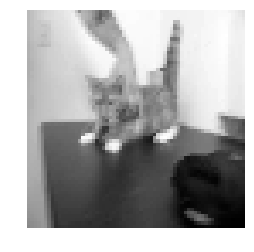

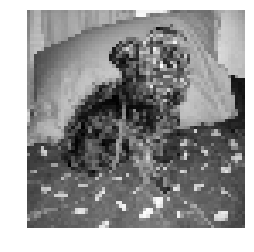

In [57]:
# Examine first cat and first dog grayscale images
show_grayscale_image(cats_1000_64_64_1[0,:,:,0])
show_grayscale_image(dogs_1000_64_64_1[0,:,:,0])

###### Base Model: DNN Model

In [58]:
# 300 and 100 nodes for layers 1 and 2 as used with MNIST from Geron
n_hidden1 = 300
n_hidden2 = 100

channels = 1  # When working with color images use channels = 3

n_inputs = 64*64

#CatsDogs# Has two output values # MNIST had ten digits n_outputs = 10  
n_outputs = 2  # binary classification for Cats and Dogs, 1 output node 0/1

reset_graph()

In [59]:
# dnn... Deep neural network model from Geron Chapter 10
# Note that this model makes no use of the fact that we have
# pixel data arranged in rows and columns
# So a 64x64 matrix of raster values becomes a vector of 4096 input variables
X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")
y = tf.placeholder(tf.int32, shape=(None), name="y")

In [60]:
# Define the NN
def neuron_layer(X, n_neurons, name, activation=None):
    with tf.name_scope(name):
        n_inputs = int(X.get_shape()[1])
        stddev = 2 / np.sqrt(n_inputs)
        init = tf.truncated_normal((n_inputs, n_neurons), stddev=stddev)
        W = tf.Variable(init, name="kernel")
        b = tf.Variable(tf.zeros([n_neurons]), name="bias")
        Z = tf.matmul(X, W) + b
        if activation is not None:
            return activation(Z)
        else:
            return Z

In [61]:
with tf.name_scope("dnn"):
    hidden1 = neuron_layer(X, n_hidden1, name="hidden1",
                           activation=tf.nn.relu)
    hidden2 = neuron_layer(hidden1, n_hidden2, name="hidden2",
                           activation=tf.nn.relu)
    logits = neuron_layer(hidden2, n_outputs, name="outputs")
    

# Loss
with tf.name_scope("loss"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y,
                                                              logits=logits)
    loss = tf.reduce_mean(xentropy, name="loss")

# Optimizer    
learning_rate = 0.01
with tf.name_scope("train"):
    optimizer = tf.train.GradientDescentOptimizer(learning_rate)
    training_op = optimizer.minimize(loss)

with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))    
runtime_overall= time.clock() - start_time_overall
print("overall time:", runtime_overall)

overall time: 45.690421


In [62]:
init = tf.global_variables_initializer()
saver = tf.train.Saver()

In [63]:
# Work the data for cats and dogs numpy arrays 
# These numpy arrays were generated in previous data prep work
# Stack the numpy arrays for the inputs
X_cat_dog = np.concatenate((cats_1000_64_64_1, dogs_1000_64_64_1), axis = 0) 
X_cat_dog = X_cat_dog.reshape(-1,64*64) # note coversion to 4096 inputs

In [64]:
# Scikit Learn for min-max scaling of the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(np.array([0., 255.]).reshape(-1,1)) 
X_cat_dog_min_max = scaler.transform(X_cat_dog)
runtime_overall= time.clock() - start_time_overall
print("overall time:", runtime_overall)

overall time: 45.803095


In [65]:
# Define the labels to be used 1000 cats = 0 1000 dogs = 1
y_cat_dog = np.concatenate((np.zeros((1000), dtype = np.int32), 
                      np.ones((1000), dtype = np.int32)), axis = 0)

In [66]:
# Random splitting of the data in to training (80%) and test (20%)  
X_train, X_test, y_train, y_test = \
    train_test_split(X_cat_dog_min_max, y_cat_dog, test_size=0.20, 
                     random_state = random_seed)

print("Shape of Training data: ", X_train.shape)
print("Shape of Test data: ", X_test.shape)

print("\nShape of Training data: ", y_train.shape)
print("Shape of Test data: ", y_test.shape)

Shape of Training data:  (1600, 4096)
Shape of Test data:  (400, 4096)

Shape of Training data:  (1600,)
Shape of Test data:  (400,)


In [67]:
init = tf.global_variables_initializer()   

In [68]:
#Training base model by using DNN
n_epochs = 50
batch_size = 100

# Record start time for neural network training
start_time_base = time.clock()

with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        for iteration in range(y_train.shape[0] // batch_size):
            X_batch = X_train[iteration*batch_size:(iteration + 1)*batch_size,:]
            y_batch = y_train[iteration*batch_size:(iteration + 1)*batch_size]
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        acc_train_base = accuracy.eval(feed_dict={X: X_batch, y: y_batch})
        acc_test_base = accuracy.eval(feed_dict={X: X_test, y: y_test})
        print(epoch, "Train accuracy:", acc_train_base, "Test accuracy:", acc_test_base)

        save_path = saver.save(sess, "./my_catdog_model")
# Predict using the test dataset
with tf.Session() as sess:
    saver.restore(sess, "./my_catdog_model") # or better, use save_path
    X_new_scaled = X_test[:50]
    Z = logits.eval(feed_dict={X: X_new_scaled})
    y_pred_base = np.argmax(Z, axis=1)
    accuracy_base = accuracy.eval(feed_dict={X: X_test, y: y_test})
# Print Metrics
print("-------- Model 1 --------")
print("\nPredicted classes:", y_pred_base)
print("Actual classes:", y_test[:25])
print("Test Set Accuracy:", accuracy_base)

# Record end time for neural network training
stop_time_base = time.clock()

#Total processing time
runtime_base = stop_time_base - start_time_base 


print("processing time:", runtime_base)
runtime_overall= time.clock() - start_time_overall
print("overall time:", runtime_overall)

0 Train accuracy: 0.64 Test accuracy: 0.5075
1 Train accuracy: 0.63 Test accuracy: 0.51
2 Train accuracy: 0.64 Test accuracy: 0.52
3 Train accuracy: 0.65 Test accuracy: 0.52
4 Train accuracy: 0.64 Test accuracy: 0.515
5 Train accuracy: 0.66 Test accuracy: 0.5225
6 Train accuracy: 0.67 Test accuracy: 0.5325
7 Train accuracy: 0.7 Test accuracy: 0.525
8 Train accuracy: 0.68 Test accuracy: 0.52
9 Train accuracy: 0.69 Test accuracy: 0.535
10 Train accuracy: 0.69 Test accuracy: 0.5325
11 Train accuracy: 0.71 Test accuracy: 0.5275
12 Train accuracy: 0.73 Test accuracy: 0.535
13 Train accuracy: 0.68 Test accuracy: 0.52
14 Train accuracy: 0.7 Test accuracy: 0.5275
15 Train accuracy: 0.74 Test accuracy: 0.535
16 Train accuracy: 0.77 Test accuracy: 0.535
17 Train accuracy: 0.79 Test accuracy: 0.535
18 Train accuracy: 0.75 Test accuracy: 0.5275
19 Train accuracy: 0.78 Test accuracy: 0.555
20 Train accuracy: 0.79 Test accuracy: 0.5825
21 Train accuracy: 0.82 Test accuracy: 0.5975
22 Train accuracy:

###### Convolution Neural Nets (CNNs) : Model 1
Model 1 : CNN (Convolutional Layer: 2, Pooling Layer: 1, Fully Connected Layer: 1, Activation Function: ReLU, Softmax)

In [69]:
#CatsDocs image has 64x64 matrix of raster values becomes a vector of 4096 input variables
tf.Session.close
height = 64
width = 64
channels = 1 #1 is used for gray scale color. 
n_inputs = height * width #64x64 - 4096 features

#Parameters for the 1st convolutional layer. 
conv1_fmaps = 32 #number of filters in the convolution
conv1_ksize = 3 #Karnel Size
conv1_stride = 1 #Straides
conv1_pad = "SAME" #Padding

#Parameters for the 2nd convolutional layer. 
conv2_fmaps = 64
conv2_ksize = 3
conv2_stride = 2
conv2_pad = "SAME"

#Parameters  pooling layer 
pool3_fmaps = conv2_fmaps

#Fully Connected Layer  pooling layer 
n_fc1 = 64 # Dmensionality of the output space.
n_outputs = 2 #2 values, Cat or Dog

#Refresh previous graph
reset_graph()
runtime_overall= time.clock() - start_time_overall
print("overall time:", runtime_overall)

overall time: 48.641718


In [70]:
### Construction Phase###

# Construct convolutional layers
with tf.name_scope("inputs"):
    X = tf.placeholder(tf.float32, shape=[None, n_inputs], name="X")
    X_reshaped = tf.reshape(X, shape=[-1, height, width, channels])
    y = tf.placeholder(tf.int32, shape=[None], name="y")

conv1 = tf.layers.conv2d(X_reshaped, filters=conv1_fmaps, kernel_size=conv1_ksize,
                         strides=conv1_stride, padding=conv1_pad,
                         activation=tf.nn.relu, name="conv1")
conv2 = tf.layers.conv2d(conv1, filters=conv2_fmaps, kernel_size=conv2_ksize,
                         strides=conv2_stride, padding=conv2_pad,
                         activation=tf.nn.relu, name="conv2")
runtime_overall= time.clock() - start_time_overall
print("overall time:", runtime_overall)

overall time: 48.6776


In [71]:

# Construct pooling layers
with tf.name_scope("pool3"):
    pool3 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding="VALID")
    pool3_flat = tf.reshape(pool3, shape=[-1, pool3_fmaps*16*16])

# Construct fully connected layer
with tf.name_scope("fc1"):
    fc1 = tf.layers.dense(pool3_flat, n_fc1, activation=tf.nn.relu, name="fc1")

# Outputs Layer with applying softmax function
with tf.name_scope("output"):
    logits = tf.layers.dense(fc1, n_outputs, name="output")
    Y_proba = tf.nn.softmax(logits, name="Y_proba")

runtime_overall= time.clock() - start_time_overall
print("overall time:", runtime_overall)

overall time: 48.709001


In [72]:
# Training with AdamOptimizaer
with tf.name_scope("train"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(logits=logits, labels=y)
    loss = tf.reduce_mean(xentropy)
    optimizer = tf.train.AdamOptimizer()
    training_op = optimizer.minimize(loss)

# Evaluation       
with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

## Create saver to save trained parameters
with tf.name_scope("init_and_save"):
    init = tf.global_variables_initializer()
    saver = tf.train.Saver()
runtime_overall= time.clock() - start_time_overall
print("overall time:", runtime_overall)

overall time: 48.838847


In [73]:
### Execution Phase###
# Set number of epochs and batch size for training model.
# Record start time for neural network training
n_epochs = 1
batch_size = 10

# Record start time for neural network training
start_time_base = time.clock()

with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        for iteration in range(y_train.shape[0] // batch_size):
            X_batch = X_train[iteration*batch_size:(iteration + 1)*batch_size,:]
            y_batch = y_train[iteration*batch_size:(iteration + 1)*batch_size]
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        acc_train_base = accuracy.eval(feed_dict={X: X_batch, y: y_batch})
        acc_test_base = accuracy.eval(feed_dict={X: X_test, y: y_test})
        print(epoch, "Train accuracy:", acc_train_base, "Test accuracy:", acc_test_base)

        save_path = saver.save(sess, "./my_catdog_model")
runtime_overall= time.clock() - start_time_overall
print("overall time:", runtime_overall)


0 Train accuracy: 0.5 Test accuracy: 0.48
overall time: 49.692453


In [74]:
# Predict using the test dataset
with tf.Session() as sess:
    saver.restore(sess, "./my_catdog_model") # or better, use save_path
    X_new_scaled = X_test[:50]
    Z = logits.eval(feed_dict={X: X_new_scaled})
    y_pred_base = np.argmax(Z, axis=1)
    accuracy_base = accuracy.eval(feed_dict={X: X_test, y: y_test})
# Print Metrics
print("-------- Model 1 --------")
print("\nPredicted classes:", y_pred_base)
print("Actual classes:", y_test[:25])
print("Test Set Accuracy:", accuracy_base)

# Record end time for neural network training
stop_time_base = time.clock()

#Total processing time
runtime_base = stop_time_base - start_time_base 

print("processing time:", runtime_base)
runtime_overall= time.clock() - start_time_overall
print("overall time:", runtime_overall)

INFO:tensorflow:Restoring parameters from ./my_catdog_model
-------- Model 1 --------

Predicted classes: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1]
Actual classes: [0 1 0 1 1 0 0 1 0 1 0 1 1 0 0 0 0 1 1 0 1 1 1 0 0]
Test Set Accuracy: 0.48
processing time: 0.9030879999999968
overall time: 49.75132099999999


###### Convolution Neural Nets (CNNs) : Model 2
CNN (Convolutional Layer: 3, Pooling Layer: 1, Fully Connected Layer: 1, Activation Function: ReLU, Softmax)

In [75]:

tf.Session.close
#CatsDocs image has 64x64 matrix of raster values becomes a vector of 4096 input variables
height = 64
width = 64
channels = 1 #1 is used for gray scale color. 
n_inputs = height * width #64x64 - 4096 features

#Parameters for the 1st convolutional layer. 
conv1_fmaps = 32 #number of filters in the convolution
conv1_ksize = 3 #Karnel Size
conv1_stride = 1 #Straides
conv1_pad = "SAME" #Padding

#Parameters for the 2nd convolutional layer. 
conv2_fmaps = 64
conv2_ksize = 3
conv2_stride = 2
conv2_pad = "SAME"

#Parameters  pooling layer 
pool3_fmaps = conv2_fmaps

#Fully Connected Layer  pooling layer 
n_fc1 = 64 # Dmensionality of the output space.
n_outputs = 2 #2 values, Cat or Dog

#Refresh previous graph
reset_graph()

Step 2

In [76]:
### Construction Phase###

# Construct convolutional layers
with tf.name_scope("inputs"):
    X = tf.placeholder(tf.float32, shape=[None, n_inputs], name="X")
    X_reshaped = tf.reshape(X, shape=[-1, height, width, channels])
    y = tf.placeholder(tf.int32, shape=[None], name="y")

conva = tf.layers.conv2d(X_reshaped, filters=conv1_fmaps, kernel_size=conv1_ksize,
                         strides=conv1_stride, padding=conv1_pad,
                         activation=tf.nn.relu, name="conva")
convb = tf.layers.conv2d(conva, filters=conv2_fmaps, kernel_size=conv2_ksize,
                         strides=conv2_stride, padding=conv2_pad,
                         activation=tf.nn.relu, name="convb")

# Construct pooling layers
with tf.name_scope("pool3"):
    pool3 = tf.nn.max_pool(convb, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding="VALID")
    pool3_flat = tf.reshape(pool3, shape=[-1, pool3_fmaps*16*16])

# Construct fully connected layer
with tf.name_scope("fc1"):
    fc1 = tf.layers.dense(pool3_flat, n_fc1, activation=tf.nn.relu, name="fc1")

# Outputs Layer with applying softmax function
with tf.name_scope("output"):
    logits = tf.layers.dense(fc1, n_outputs, name="output")
    Y_proba = tf.nn.softmax(logits, name="Y_proba")

# Training with AdamOptimizaer
with tf.name_scope("train"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(logits=logits, labels=y)
    loss = tf.reduce_mean(xentropy)
    optimizer = tf.train.AdamOptimizer()
    training_op = optimizer.minimize(loss)

# Evaluation       
with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

## Create saver to save trained parameters
with tf.name_scope("init_and_save"):
    init = tf.global_variables_initializer()
    saver = tf.train.Saver()

Step3

In [77]:
### Execution Phase###
# Set number of epochs and batch size for training model.
# Record start time for neural network training
n_epochs = 50
batch_size = 100

# Record start time for neural network training
start_time_base = time.clock()

with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        for iteration in range(y_train.shape[0] // batch_size):
            X_batch = X_train[iteration*batch_size:(iteration + 1)*batch_size,:]
            y_batch = y_train[iteration*batch_size:(iteration + 1)*batch_size]
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        acc_train_base = accuracy.eval(feed_dict={X: X_batch, y: y_batch})
        acc_test_base = accuracy.eval(feed_dict={X: X_test, y: y_test})
        print(epoch, "Train accuracy:", acc_train_base, "Test accuracy:", acc_test_base)

        save_path = saver.save(sess, "./my_catdog_model")
# Predict using the test dataset
with tf.Session() as sess:
    saver.restore(sess, "./my_catdog_model") # or better, use save_path
    X_new_scaled = X_test[:50]
    Z = logits.eval(feed_dict={X: X_new_scaled})
    y_pred_base = np.argmax(Z, axis=1)
    accuracy_base = accuracy.eval(feed_dict={X: X_test, y: y_test})
# Print Metrics
print("-------- Model 1 --------")
print("\nPredicted classes:", y_pred_base)
print("Actual classes:", y_test[:25])
print("Test Set Accuracy:", accuracy_base)

# Record end time for neural network training
stop_time_base = time.clock()

#Total processing time
runtime_base = stop_time_base - start_time_base 


print("processing time:", runtime_base)
runtime_overall= time.clock() - start_time_overall
print("overall time:", runtime_overall)

0 Train accuracy: 0.59 Test accuracy: 0.48
1 Train accuracy: 0.59 Test accuracy: 0.48
2 Train accuracy: 0.64 Test accuracy: 0.525
3 Train accuracy: 0.68 Test accuracy: 0.6025
4 Train accuracy: 0.7 Test accuracy: 0.6075
5 Train accuracy: 0.77 Test accuracy: 0.6175
6 Train accuracy: 0.79 Test accuracy: 0.62
7 Train accuracy: 0.79 Test accuracy: 0.6125
8 Train accuracy: 0.82 Test accuracy: 0.6125
9 Train accuracy: 0.85 Test accuracy: 0.635
10 Train accuracy: 0.86 Test accuracy: 0.6475
11 Train accuracy: 0.93 Test accuracy: 0.64
12 Train accuracy: 0.91 Test accuracy: 0.6675
13 Train accuracy: 0.96 Test accuracy: 0.6575
14 Train accuracy: 0.97 Test accuracy: 0.6325
15 Train accuracy: 0.9 Test accuracy: 0.6275
16 Train accuracy: 0.98 Test accuracy: 0.66
17 Train accuracy: 0.96 Test accuracy: 0.6525
18 Train accuracy: 0.99 Test accuracy: 0.65
19 Train accuracy: 1.0 Test accuracy: 0.6525
20 Train accuracy: 1.0 Test accuracy: 0.6175
21 Train accuracy: 1.0 Test accuracy: 0.63
22 Train accuracy: 

###### Convolution Neural Nets (CNNs) : Model 3
CNN with Dropout (....)

###### Convolution Neural Nets (CNNs) : Model 4
CNN with Dropout (.....)

##### Try with different image resolutions as well 

##### Summary Table

In [78]:
# Import panda to create summary table
import pandas as pd

summary_DF =\
pd.DataFrame([["Base", "M1", "M2", "M3", "M4"],
              ["DNN", "CNN", "CNN", "CNN", "CNN"],
              ['',2,4,2,4],
              ['',1,2,1,2],
              ['',1,1,1,1],
              ['Relu','Relu','Relu','Relu','Relu'],
              ['No','No','No','Yes','Yes'],
              [round(runtime_base,1), round(runtime_M1,1), round(runtime_M2,1), round(runtime_M3,), round(runtime_M4,1)],
              [acc_train_base, acc_train_M1, acc_train_M2, acc_train_M3, acc_train_M4],
              [accuracy_base, accuracy_M1, accuracy_M2, accuracy_M3, accuracy_M4]] ).T

# Column Name and Index
summary_DF.columns = ["Model","Neural\nNetwork\nType", "Convolutional\nLayers", "Pooling\nLayers", "Fully\nConnected\nLayers",
                      "Activate\nFunction","Dropout","Run_Time","Training_Set\nAccuracy","Test_Set\nAccuracy"]
summary_DF.index   = [1,2,3,4,5]


NameError: name 'runtime_M2' is not defined

In [ ]:
print('------------------------------- Summary Table -------------------------------')
summary_DF

Management Problem : 
Assume that we are providing advice to a website provider who is looking for tools to automatically label images provided by end users. As we look across the factors in the study, making recommendations to management about image classification, we are most concerned about achieving the highest possible accuracy in image classification. That is, we should be willing to sacrifice training time for model accuracy. What type of machine learning model works best? If it is a convolutional neural network, what type of network should we use? Part of this recommendation may concern information about the initial images themselves (input data for the classification task). What types of images work best ?


#### REPORT/FINDINGS: 
(1) A summary and problem definition for management; 

(2) Discussion of the research design, measurement and statistical methods, traditional and machine learning methods employed 

(3) Overview of programming work; 

(4) Review of results with recommendations for management.

